受け取り：numpyの距離行列

出力：Newickフォーマット(str型)


説明：

In [1]:
! pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import math

class UPGMA:

  def __init__(self, dist_matrix, name_list):
    self.newick = self.calculate(dist_matrix, name_list)


  def calculate(self, dist_matrix, name_list): #最小値が複数ある場合は先に出て来たペアがくっつくので改良の余地あり。ex)(A, B, C)みたいなのがない
    dist_matrix = dist_matrix.astype(np.float32)
    max_score = dist_matrix.max()
    num = len(name_list)
    for p in range(num):
      for q in range(p+1):
        dist_matrix[num-1-p, num-q-1] = max_score + 1

    while dist_matrix.shape[0] > 2:
      min_idx = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
      i = min_idx[0]
      j = min_idx[1]
      name_list[j] = '(' + name_list[j] + ', ' + name_list[i] + ')'
      name_list.pop(i)

      for p in range(dist_matrix.shape[0] - 1 - i):
        dist_matrix[i+p+1, j] = (dist_matrix[i+p+1, j] + dist_matrix[i+p+1, i]) / 2
      for p in range(i-j-1):
        dist_matrix[i-p-1, j] = (dist_matrix[i-p-1, j] + dist_matrix[i, i-p-1]) / 2
        #dist_matrix[j+1+p, j] = (dist_matrix[j+1+p, j] + dist_matrix[i, j+1+p]) / 2
      for p in range(j):
        dist_matrix[j, p] = (dist_matrix[i, p] + dist_matrix[j, p]) / 2

      #calを戻す、削除操作追加
      dist_matrix = np.delete(dist_matrix, i, 0)
      dist_matrix = np.delete(dist_matrix, i, 1)
    
    return name_list[0] + ', ' + name_list[1]


  def return_result(self):
    return self.newick

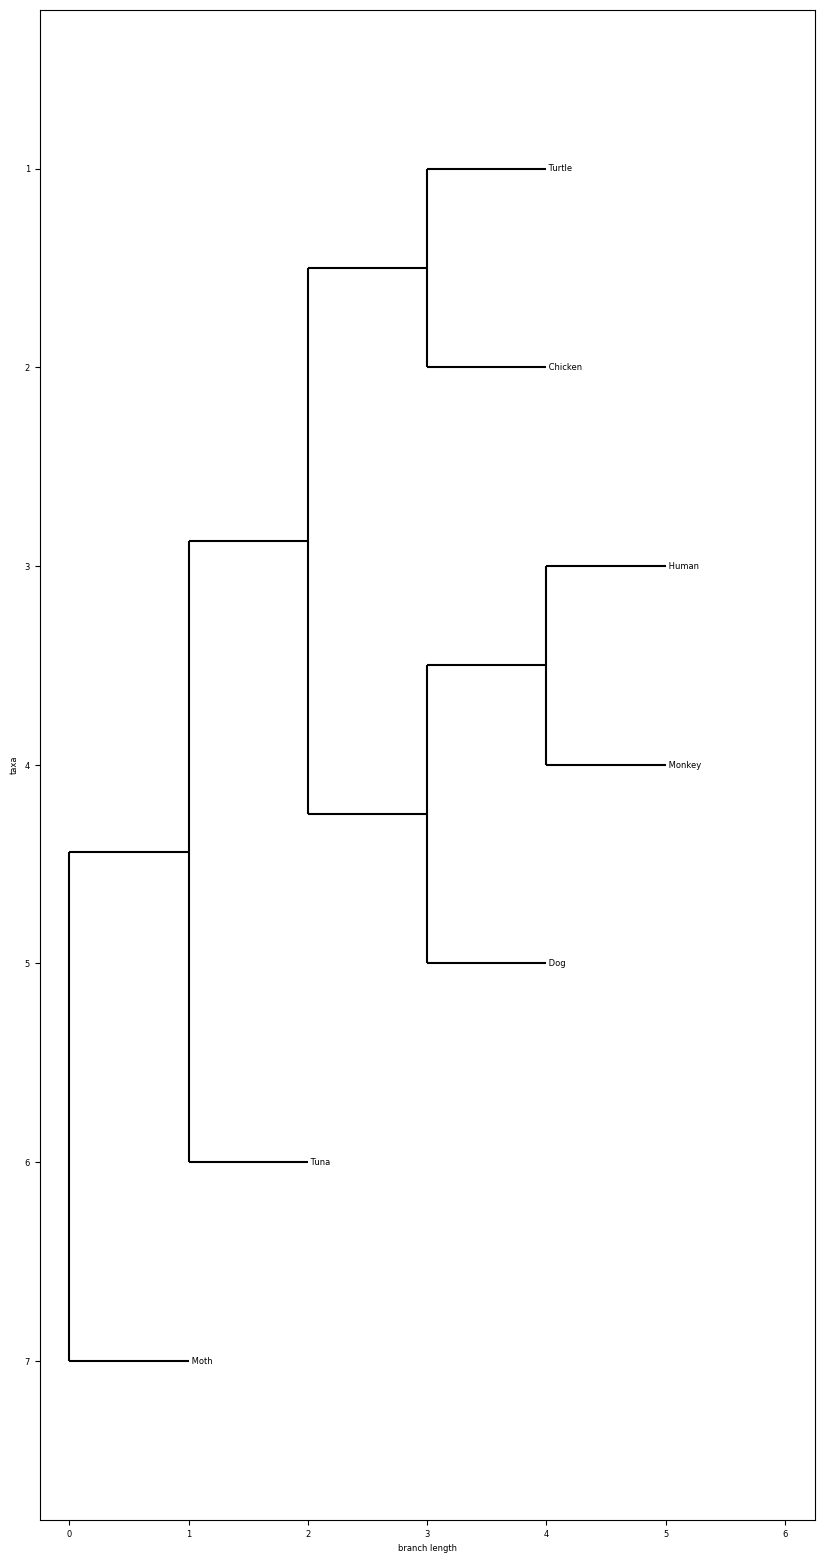

In [3]:
from io import StringIO
from Bio import Phylo
from Bio.Phylo.BaseTree import Tree

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

taxa = ["Turtle", "Human", "Tuna", "Chicken", "Moth", "Monkey", "Dog"]
distances = np.array(
    [
      [0, 19, 27, 8, 33, 18, 13],
     [19, 0, 31, 18, 36, 1, 13],
            [27, 31, 0, 26, 41, 32, 29],
            [8, 18, 26, 0, 31, 17, 14],
            [33, 36, 41, 31, 0, 35, 28],
            [18, 1, 32, 17, 35, 0, 12],
            [13, 13, 29, 14, 28, 12, 0],
        ]
    )
up = UPGMA(distances, taxa)

treedata = up.return_result()

handle = StringIO(treedata)  # parse the newick string
tree = Phylo.read(handle, "newick")
matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)